In [97]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# 1.Load the data

Read the “housing.csv” file from the folder into the program.

In [4]:
data = pd.read_excel('1553768847_housing (1).xlsx')

Print first few rows of this data.

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Extract input (X) and output (Y) data from the dataset.

In [6]:
X = data.drop('median_house_value',axis=1) #all metrics
y = data['median_house_value'] #target

# 2. Handle missing values

Fill the missing values with the mean of the respective column.

In [7]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [8]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

In [10]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# 3. Encode categorical data

Convert categorical column in the dataset to numerical data.

In [11]:
data['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [12]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [15]:
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

# 4. Split the dataset

Split the data into 80% training dataset and 20% test dataset.

In [16]:
X = data.drop('median_house_value',axis=1) #all metrics
y = data['median_house_value'] #target

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# 5. Standardize data

Standardize training and test datasets.

In [28]:
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

X_train_standardized = (X_train - X_train_mean) / X_train_std
X_test_standardized = (X_test - X_train_mean) / X_train_std

In [29]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15961,-122.43,37.71,52,1410,286.0,879,282,3.1908,3
1771,-122.35,37.95,42,1485,290.0,971,303,3.6094,3
16414,-121.24,37.90,16,50,10.0,20,6,2.6250,1
5056,-118.35,34.02,34,5218,1576.0,3538,1371,1.5143,0
8589,-118.39,33.89,38,1851,332.0,750,314,7.3356,0
...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17,1768,474.0,1079,436,1.7823,0
17289,-119.63,34.42,42,1765,263.0,753,260,8.5608,0
5192,-118.26,33.93,42,1433,295.0,775,293,1.1326,0
12172,-117.16,33.73,10,2381,454.0,1323,477,2.6322,1


In [32]:
#Or using th StandardScaler from Sklearn
"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
"""

'\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train_standardized = scaler.transform(X_train)\nX_test_standardized = scaler.transform(X_test)\n'

# 6. Perform Linear Regression

Perform Linear Regression on training data.<br>
Predict output for test dataset using the fitted model.<br>
Print root mean squared error (RMSE) from Linear Regression.<br>
[ HINT: Import mean_squared_error from sklearn.metrics ]<br>

In [67]:
LR_clf = LinearRegression()
LR_clf.fit(X_train_standardized,y_train)
pred = LR_clf.predict(X_test_standardized)

In [68]:
MSE = mean_squared_error(y_test, pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for Linear Regression:\n")
print(RMSE)

Root Mean Square Error for Linear Regression:

69888.79391558649


# 7. Perform Decision Tree Regression

Perform Decision Tree Regression on training data. <br>
Predict output for test dataset using the fitted model.<br>
Print root mean squared error from Decision Tree Regression.<br>

In [65]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train_standardized,y_train)
pred = DT_clf.predict(X_test_standardized)

In [66]:
MSE = mean_squared_error(y_test, pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for Decision Tree:\n")
print(RMSE)

Root Mean Square Error for Decision Tree:

77048.44316171414


# 8. Perform Random Forest Regression

Perform Random Forest Regression on training data.<br>
Predict output for test dataset using the fitted model.<br>
Print RMSE (root mean squared error) from Random Forest Regression.<br>

In [71]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_standardized,y_train)
pred = RF_clf.predict(X_test_standardized)

MemoryError: could not allocate 962330624 bytes

In [ ]:
MSE = mean_squared_error(y_test, pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for Random Forest:\n")
print(RMSE)

# 9. Bonus exercise: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).<br>
Perform Linear Regression to predict housing values based on median_income.<br>
Predict output for test dataset using the fitted model.<br>
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.<br>

In [88]:
X_train_income = X_train.iloc[:,7:8]
X_test_income = X_test.iloc[:,7:8]

In [89]:
LR_clf = LinearRegression()
LR_clf.fit(X_train_income,y_train)
pred = LR_clf.predict(X_test_income)

MSE = mean_squared_error(y_test, pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for Linear Regression:\n")
print(RMSE)

Root Mean Square Error for Linear Regression:

83228.17849797675


In [95]:
comparison_df = pd.DataFrame({'Actual':y_test, 'Predicted': pred})
comparison_df

,Actual,Predicted
4712,355000,181402.070118
2151,70700,127924.350509
15927,229400,213498.795194
82,112500,108679.773210
8161,225400,262548.075140
...,...,...
2319,68200,142176.945017
5341,225000,136718.146648
16888,350000,257017.782495
6823,227300,249742.188367


In [106]:
comparison_df = comparison_df.sort_index()

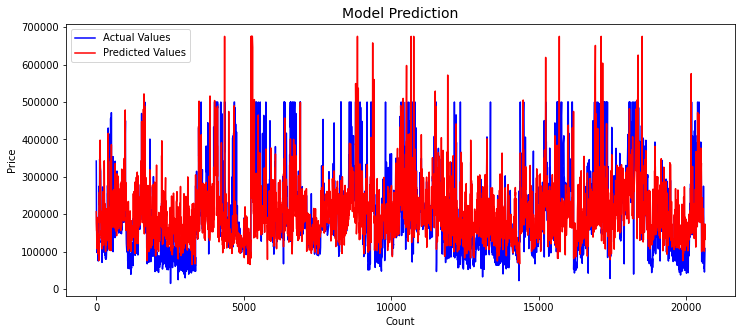

In [110]:
plt.figure(figsize=(12,5))
plt.title('Model Prediction', fontsize=14)
plt.plot(comparison_df['Actual'],color="blue",label="Actual Values")
plt.plot(comparison_df['Predicted'],color="red",label="Predicted Values")
plt.xlabel("Count")
plt.ylabel("Price")
plt.legend()
plt.show()